# Kaggle: Backpack Prediction Challenge EDA

## About The Competition

### **🎯 Objective**
Predict the price of backpacks given various attributes.

### **🗽 Evaluation Criteria**

Root Mean Squared Error (RMSE)
Submissions are scored on the root mean squared error. RMSE is defined as:

$$\text{RMSE} = \left( \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right)^{\frac{1}{2}}$$

## Load Data

### Setup seaborn Style

In [69]:
import seaborn as sns

# set context and style plots
sns.set_context("poster",font_scale=0.6, rc={"grid.linewidth": 0.4})

# set Font Family
sns.set_style({'font.family':'serif'})

#defining colour palette
red = ["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"]
bo = ["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"]
pink = ["#aa4465","#dd2d4a","#f26a8d","#f49cbb","#ffcbf2","#e2afff","#ff86c8","#ffa3a5","#ffbf81","#e9b827","#f9e576"]

### Load the raw dataset

Load and take a look at the dataset.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv(r'..\data\raw\train.csv')
test_df = pd.read_csv(r'..\data\raw\test.csv')

# Print the dataframe
train_df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


### Statistical Summary
Show statistical data on numerical features

In [71]:
# use describe to get the summary statistics of the data
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.750000,149999.500000,224999.250000,299999.0
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


### Type Analysis
Check the `dtype` of each feature. It's looks like each feature has it's proper type. There are only two numerical features (ignoring the target and id), compartments, and weight.

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [73]:
# Create list of numerical and categorical features
numerical_features = train_df.select_dtypes(include=['int64', 'float64'])
categorical_features = train_df.select_dtypes(include=['object'])

### Missing Values Check
Graph the percent of missing values for each feature, color code numerical and categorical data. Also look graph a heatmap of missing values to see if there are any obviuos patterns.

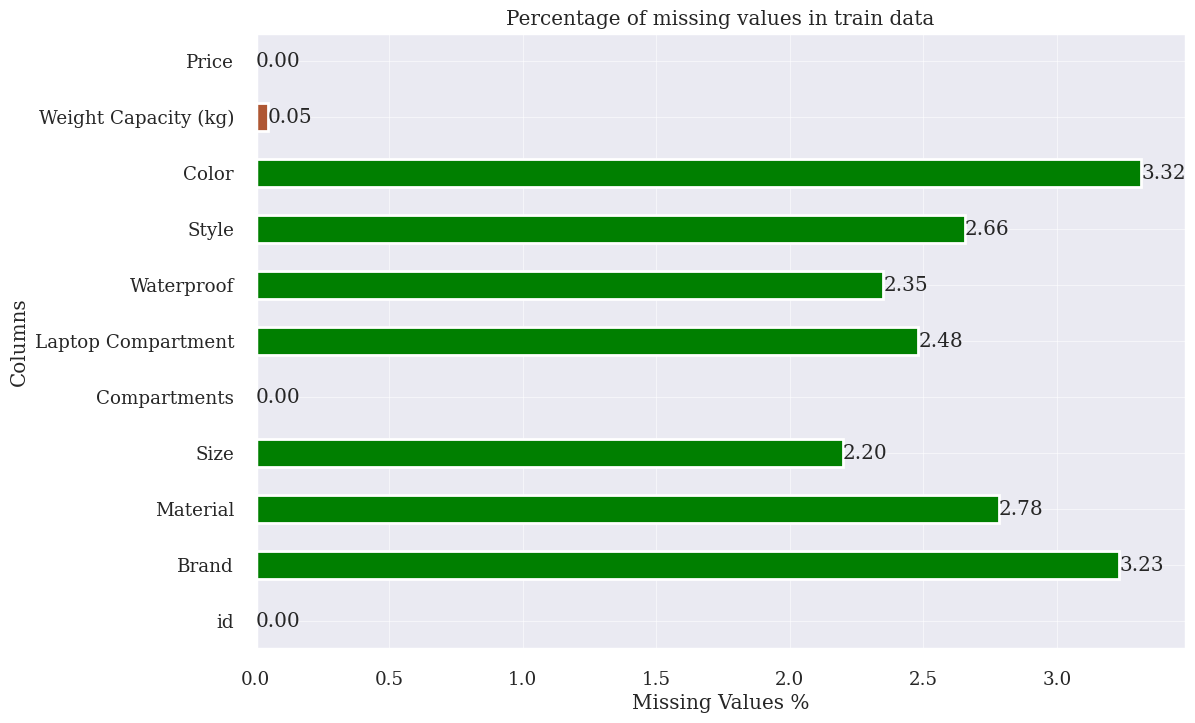

In [74]:
# Calculate percentage of missing values for each column
missing_pct = (train_df.isnull().sum() / train_df.shape[0]) * 100

# Create a list of colors: green for numerical features, pink for categorical features
colors = ["#AF5733" if col in numerical_features else "#007F00" for col in missing_pct.index]

plt.figure(figsize=(12, 8))
ax = missing_pct.plot(kind='barh', color=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.xlabel('Missing Values %')
plt.ylabel('Columns')
plt.title('Percentage of missing values in train data')
sns.set_style('darkgrid')
plt.show()

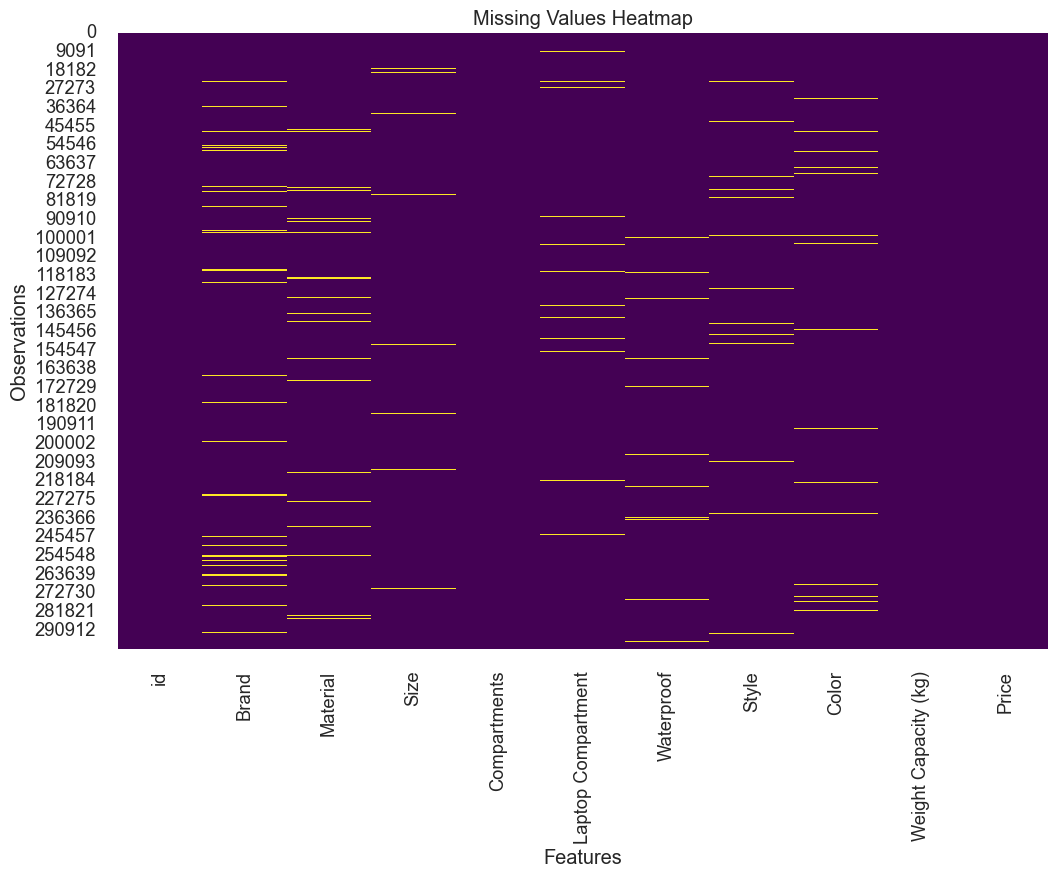

In [75]:
# Create a boolean mask for missing values
missing_mask = train_df.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Observations')
plt.show()

## Exploratory Data Analysis (EDA)

### Categorical Analysis
Plot a distribution for each categorical feature. A bar chart and pie chart is shown for the following features:
- Brand
- Material
- Size
- Compartments
- Laptop Compartment

In [76]:
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px

colors = ['#4E5166', '#7C90A0', '#B5AA9D', '#B9B7A7','#747274']
# colors = ['#542344','#BFD1E5', '#EBF5EE', '#D8BFAA', '#808080']
# colors = ['#541388','#D90368','#F1E9DA','#2E294E','#FFD400']
labels = train_df['Brand'].value_counts().index
values = train_df['Brand'].value_counts()

# create pie chart 
pie_chart =  go.Figure(go.Pie(labels=labels,values=values))
pie_chart.update_traces(hoverinfo='label+value',textinfo='percent', textfont_size=20,
                        marker=dict(colors=colors,line=dict(color='#000000', width=2)))

# creat bar chart
bar_chart=go.Figure(go.Bar(x=labels, y=values,marker_color=colors))

# create subplots
fig=sp.make_subplots(rows=1,cols=2,column_width=[0.5,0.5], specs = [[{'type':'bar'},{'type':'pie'}]],
                    subplot_titles=('Bar Chart','Pie Chart'))

# Add charts to subplots
fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# update layout
fig.update_layout(showlegend=False,title_text='Distribution of Brand',
                  xaxis=dict(title='Brand', titlefont_size=16, tickfont_size=14),
                  yaxis=dict(title='Count', titlefont_size=16, tickfont_size=14),
                 )
# show subplots
fig.show()

In [77]:
colors = ['#F8C6C3', '#F2B79F', '#E5B769', '#D8CC34']

labels = train_df['Material'].value_counts().index
values = train_df['Material'].value_counts()

# create pie chart 
pie_chart =  go.Figure(go.Pie(labels=labels,values=values))
pie_chart.update_traces(hoverinfo='label+value',textinfo='percent', textfont_size=20,
                        marker=dict(colors=colors,line=dict(color='#000000', width=2)))

# creat bar chart
bar_chart=go.Figure(go.Bar(x=labels, y=values,marker_color=colors))

# create subplots
fig=sp.make_subplots(rows=1,cols=2,column_width=[0.5,0.5], specs = [[{'type':'bar'},{'type':'pie'}]],
                    subplot_titles=('Bar Chart','Pie Chart'))

# Add charts to subplots
fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# update layout
fig.update_layout(showlegend=False,title_text='Distribution of Material',
                  xaxis=dict(title='Material', titlefont_size=16, tickfont_size=14),
                  yaxis=dict(title='Count', titlefont_size=16, tickfont_size=14),
                 )
# show subplots
fig.show()

In [78]:
colors = ['#F9DBBD','#FCA17D','#DA627D']
labels = train_df['Size'].value_counts().index
values = train_df['Size'].value_counts()

# Create Pie Chart
pie_chart = go.Figure(go.Pie(labels=labels, values = values))
pie_chart.update_traces(hoverinfo = 'label+value', textinfo = 'percent', textfont_size = 20,
                       marker=dict(colors=colors, line = dict(color='#000000', width=2)))

# Create Bar Chart
bar_chart = go.Figure(go.Bar(x = labels,y = values,marker_color=colors))

# Create Subplots

fig = sp.make_subplots(rows = 1,cols = 2, column_width = [0.5,0.5], specs = [[{'type':'bar'},{'type':'pie'}]],
                      subplot_titles = ('Bar Chart', 'Pie Chart'))

# Add charts to the subplot

fig.add_trace(bar_chart.data[0],row = 1,col = 1)
fig.add_trace(pie_chart.data[0],row = 1,col = 2)

# Update Layout

fig.update_layout(showlegend = False, title_text = 'Distribution of Size',
                 xaxis = dict(title = 'Size', titlefont_size = 16, tickfont_size = 14),
                 yaxis = dict(title = 'Size', titlefont_size = 16, tickfont_size = 14),
                 )

# show subplots
fig.show()

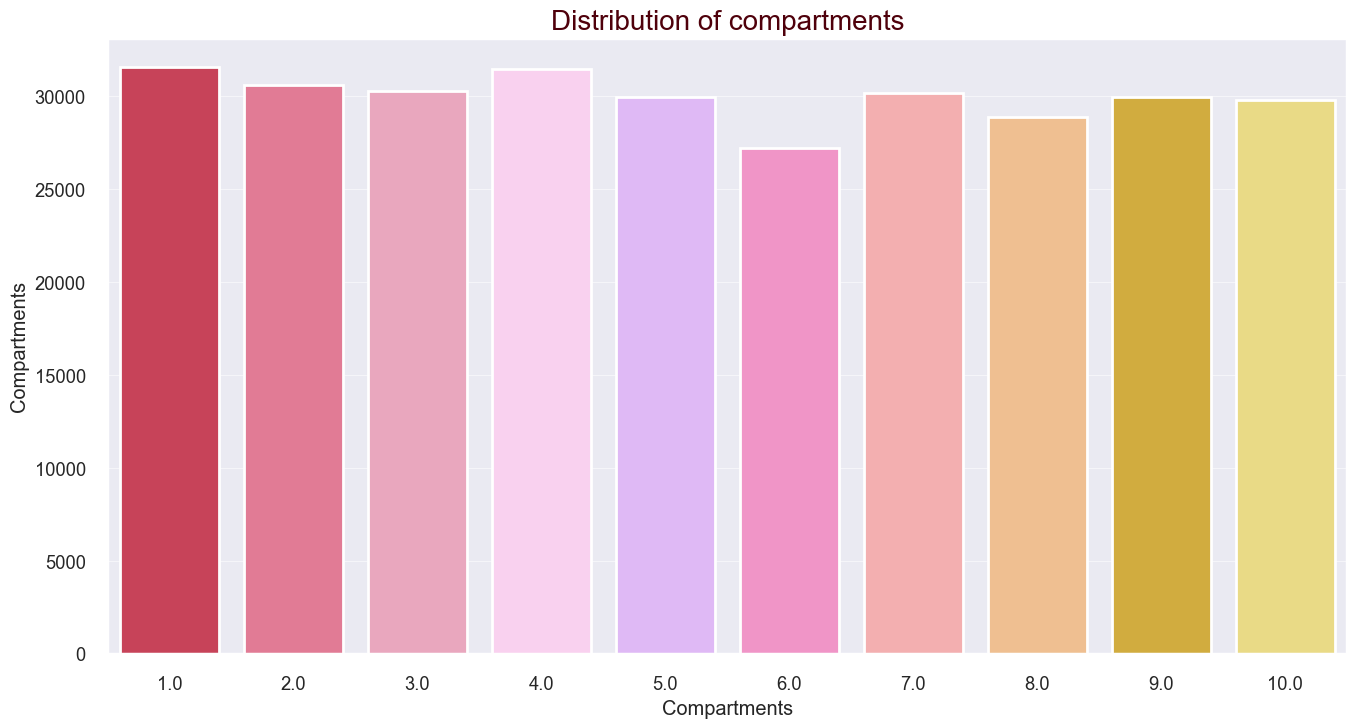

In [79]:
plt.figure(figsize=(16,8))
plt.title('Distribution of compartments', size=20, color=red[0])
sns.countplot(train_df,x='Compartments', palette=pink[1:])
plt.ylabel('Compartments')
plt.show()

In [80]:
colors = ['#313B72','#62A87C']

labels = train_df['Laptop Compartment'].value_counts().index
values = train_df['Laptop Compartment'].value_counts()

# create pie chart 
pie_chart =  go.Figure(go.Pie(labels=labels,values=values))
pie_chart.update_traces(hoverinfo='label+value',textinfo='percent', textfont_size=20,
                        marker=dict(colors=colors,line=dict(color='#ffffff', width=2)))

# creat bar chart
bar_chart=go.Figure(go.Bar(x=labels, y=values,marker_color=colors))

# create subplots
fig=sp.make_subplots(rows=1,cols=2,column_width=[0.5,0.5], specs = [[{'type':'bar'},{'type':'pie'}]],
                    subplot_titles=('Bar Chart','Pie Chart'))

# Add charts to subplots
fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# update layout
fig.update_layout(showlegend=False,title_text='Distribution of Laptop',
                  xaxis=dict(title='Laptop Compartment', titlefont_size=16, tickfont_size=14),
                  yaxis=dict(title='Count', titlefont_size=16, tickfont_size=14),
                 )
# show subplots
fig.show()

### Feature-Target Relationship
We will plot the relationship with the target for both numerical and catagorical data seperately. Notice that there seems to be no obvious connection between features and targets. This may make prediction difficult.

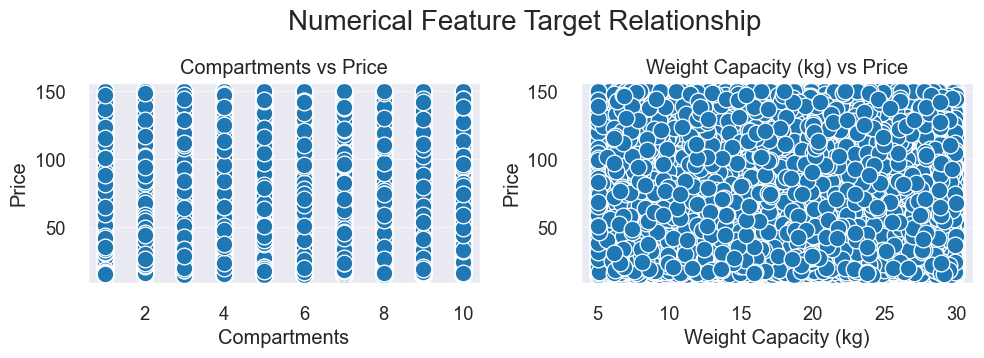

In [81]:
# Drop the target column "Price" from the features list
features = numerical_features.columns.drop(['Price', 'id'], errors='ignore')
n_features = len(features)

# Define the subplot grid dimensions (adjust cols as needed)
cols = 3
rows = math.ceil(n_features / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over each feature and create a scatter plot against the target "Price"
for ax, feature in zip(axes, features):
    sns.scatterplot(data=train_df, x=feature, y='Price', ax=ax)
    ax.set_title(f'{feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

# Remove any extra subplots (if the grid size is larger than the number of features)
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Add a super title to the entire figure
fig.suptitle('Numerical Feature Target Relationship', fontsize=20, x=0.2, y=.9, horizontalalignment='left')

# Adjust layout so the title doesn't overlap with subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

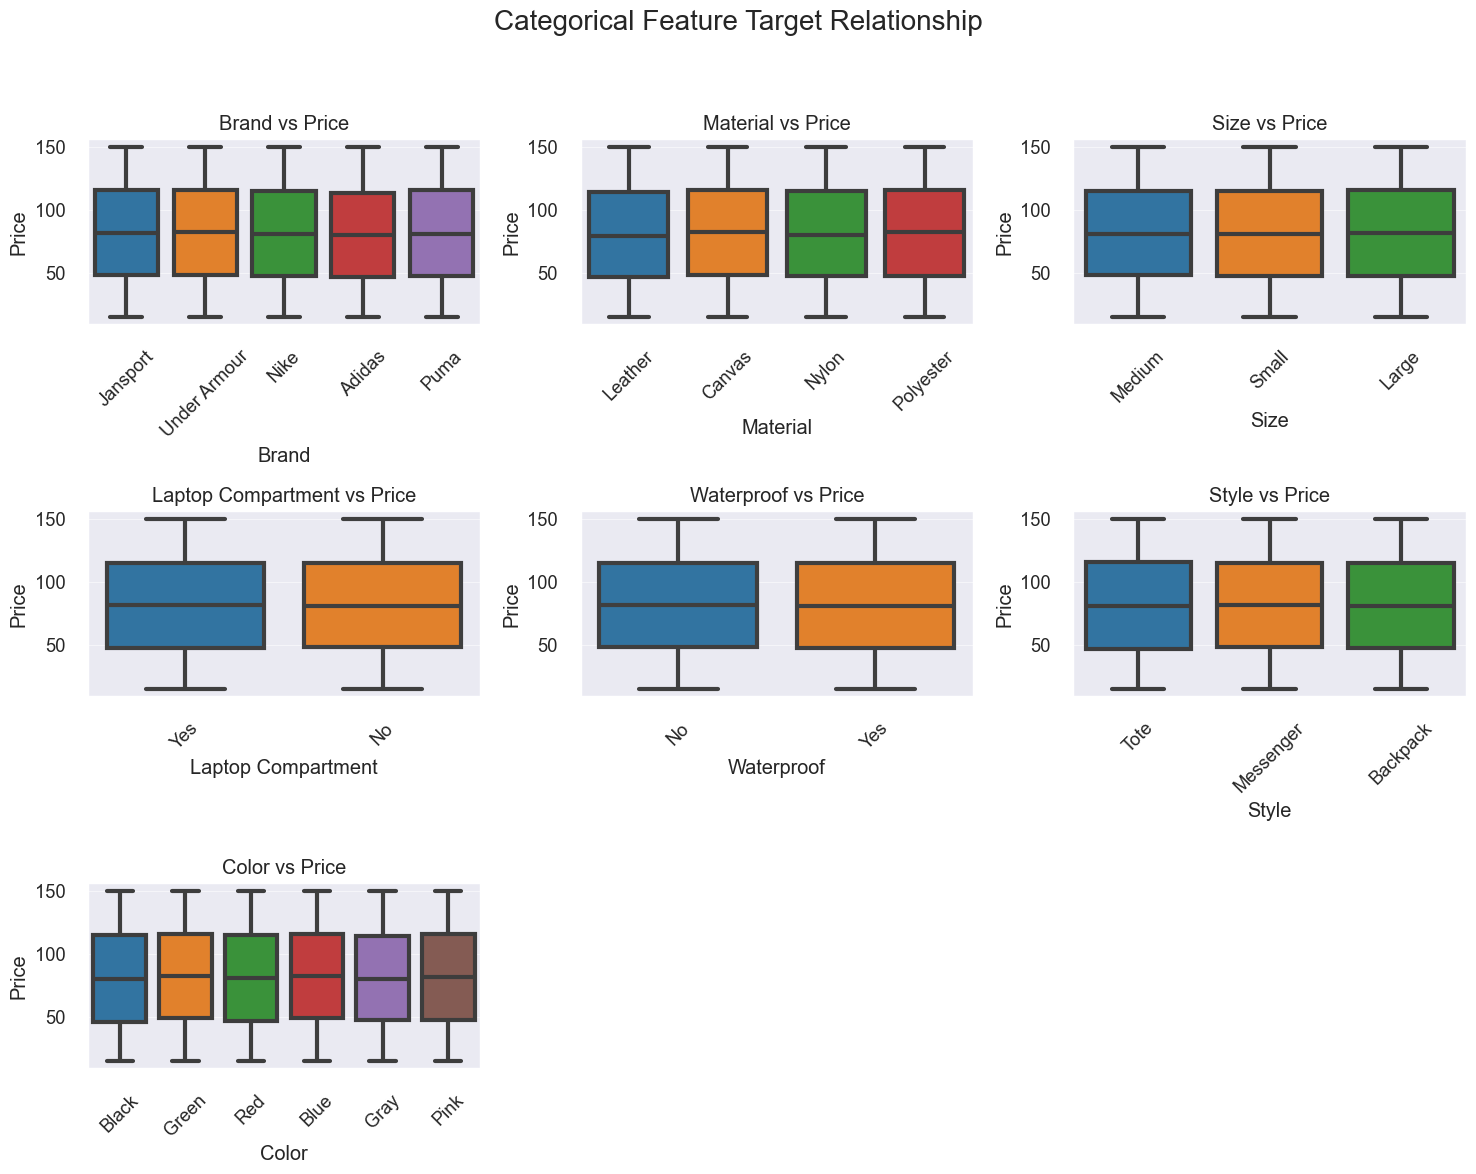

In [82]:
# Extract categorical features from train_df and drop "Price" and "id" if present
categorical_features = train_df.select_dtypes(include=['object']).columns.drop(['Price', 'id'], errors='ignore')
n_features = len(categorical_features)

# Define the subplot grid dimensions (adjust cols as needed)
cols = 3
rows = math.ceil(n_features / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over each categorical feature and create a boxplot of Price by category
for ax, feature in zip(axes, categorical_features):
    sns.boxplot(data=train_df, x=feature, y='Price', ax=ax)
    ax.set_title(f'{feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    # Rotate x tick labels for better readability if needed
    ax.tick_params(axis='x', rotation=45)

# Remove any extra subplots (if the grid size is larger than the number of features)
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Add a super title to the entire figure
fig.suptitle('Categorical Feature Target Relationship', fontsize=20, x=0.5, ha='center')

# Adjust layout so the title doesn't overlap with subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Correlation
Use a heatmap to visualize correlation between features. Almost no correlation is found. Very concerning...

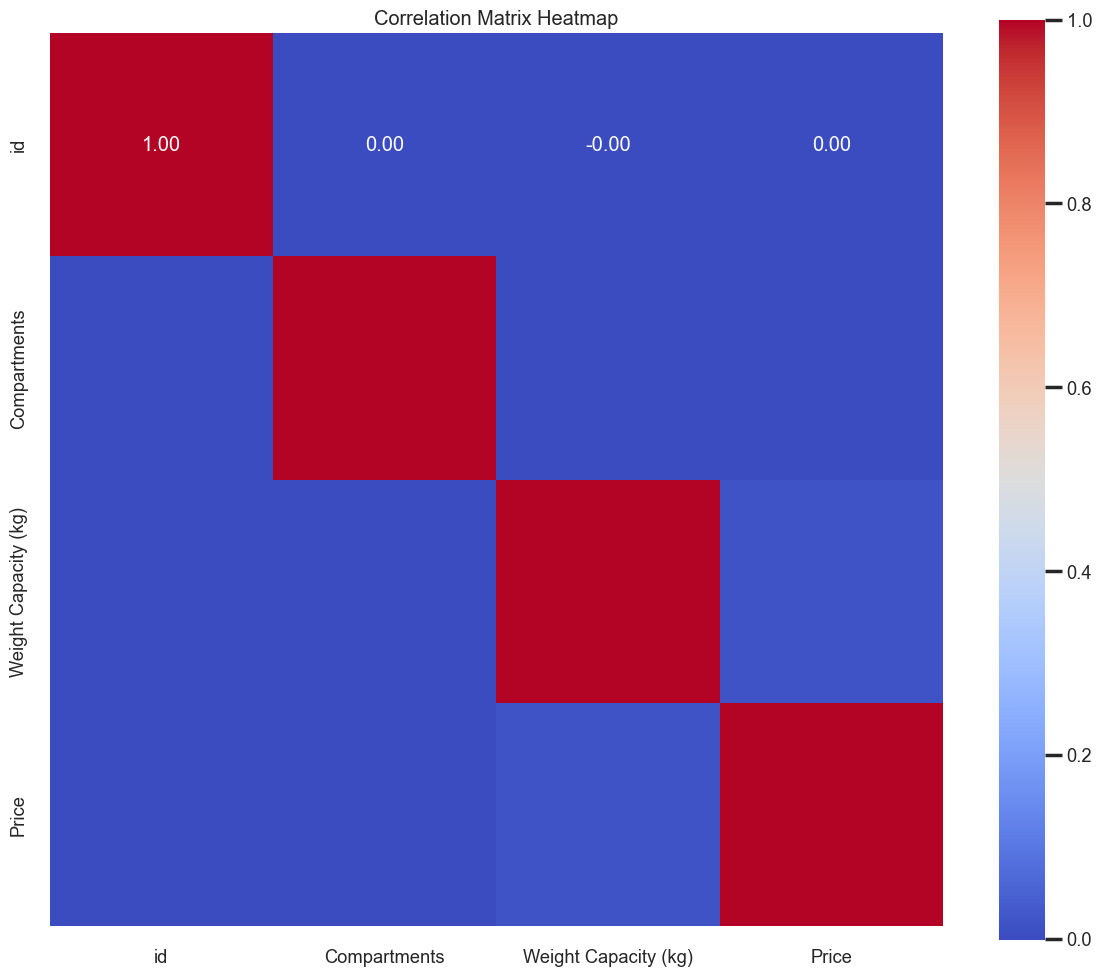

In [83]:
# Filter to only numeric columns to avoid conversion errors
corr_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()